In [152]:
import numpy as np
import pandas as pd

In [153]:
data_set = pd.read_csv('Flight_Price_Dataset_Q2.csv')
X = data_set.drop(columns='price')
Y = data_set['price']

In [154]:
#Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [155]:
#Data Filling
data_set.isnull().sum()

departure_time    0
stops             0
arrival_time      0
class             0
duration          0
days_left         0
price             0
dtype: int64

In [156]:
#Data Encoding

x_train['departure_time_encoded'] = x_train['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
x_test['departure_time_encoded'] = x_test['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

x_train['arrival_time_encoded'] = x_train['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
x_test['arrival_time_encoded'] = x_test['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

x_train['stops_encoded'] = x_train['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})
x_test['stops_encoded'] = x_test['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})

x_train['class_encoded'] = x_train['class'].map({'Economy': 1, 'Business': 2})
x_test['class_encoded'] = x_test['class'].map({'Economy': 1, 'Business': 2})


x_train = x_train.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])
x_test = x_test.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])

In [157]:
x_train

,duration,days_left,departure_time_encoded,arrival_time_encoded,stops_encoded,class_encoded
204830,5.67,27,2,4,2,2
31762,2.17,49,5,6,1,1
205026,27.50,29,4,5,2,2
115747,20.08,9,3,2,2,1
3559,16.33,21,4,2,2,1
...,...,...,...,...,...,...
224175,12.25,7,4,1,2,2
260558,14.75,34,2,5,2,2
137792,13.42,7,5,2,2,1
135103,14.08,23,4,1,2,1


In [158]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# def normalization(data:pd.DataFrame):
#     for col in data.columns:
#         min_value = data[col].min()
#         max_value = data[col].max()
#         norm = lambda x : (x - min_value)/(max_value - min_value)
#         data[col] = data[col].map(norm)
#     return data

# x_train = normalization(x_train)
# x_test = normalization(x_test)
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns, index=x_test.index)

In [159]:
from sklearn.metrics import mean_squared_error , r2_score
import time

class Regression:
    def __init__(self):
        self.mse_g = None
        self.r2_g = None
        self.weight = None

    def fit(self, x:pd.DataFrame, y:pd.DataFrame, epoch:int, learning_rate: int):
        m = len(x)
        if x.iloc[0, 0] != 1:
            x.insert(0, 'bias', 1)

        self.mse_g = np.ones(epoch)
        self.r2_g = np.ones(epoch)
        self.weight = np.ones(len(x_train.columns))

        start_time = time.time()
        for i in range(epoch):
            gradient = 2/m * x.T.dot(self.predict(x) - y)
            self.weight = self.weight - learning_rate * gradient
            self.mse_g[i] = mean_squared_error(y, self.predict(x))
            self.r2_g[i] = r2_score(y, self.predict(x))
        print ("My program took", time.time() - start_time, "to run")

    def predict(self, df:pd.DataFrame):
        if df.iloc[0, 0] != 1:
            df.insert(0, 'bias', 1)
        return np.dot(df, self.weight)

In [160]:
reg = Regression()

epochs = 500
reg.fit(x_train, y_train, epochs, 0.03)
reg.weight

My program took 18.49924612045288 to run


bias                       3983.659693
duration                   5010.656452
days_left                 -5793.882952
departure_time_encoded     -392.715861
arrival_time_encoded       1441.520826
stops_encoded              8432.120746
class_encoded             45643.355192
dtype: float64

In [161]:
#mean square error
y_pred_test = reg.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

52680204.599211514

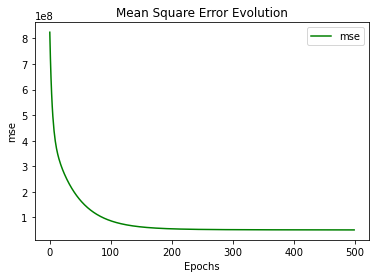

In [162]:
#mse plot
import matplotlib.pyplot as plt

plt.plot(range(epochs), reg.mse_g, 'g', label='mse')
plt.title('Mean Square Error Evolution')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

In [163]:
#R2 Error
from sklearn.metrics import  r2_score
y_pred_test = reg.predict(x_test)
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.897180035153064

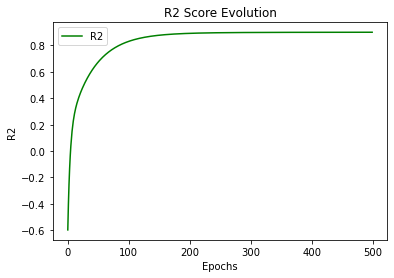

In [164]:
#R2 plot
plt.plot(range(epochs), reg.r2_g, 'g', label='R2')
plt.title('R2 Score Evolution')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

In [165]:
#RMSE
rmse_test = np.sqrt(mse_test)
rmse_test

7258.113019181467

In [166]:
#MAE
from sklearn.metrics import mean_absolute_error
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

4511.741656313711